# 🏐 Volleyball Match EDA- Fawwaz Ibrahim
This notebook explores volleyball match performance data from the VNL 2023 season. I'll perform data cleaning, summary statistics, and visualizations to uncover patterns in player and team performance.


## 📦 Importing Libraries
We begin by importing standard data science libraries: pandas for data handling, matplotlib and seaborn for visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Loading the Dataset
We load the dataset from a CSV file into a pandas DataFrame.


In [2]:
df = pd.read_csv("VNL2023.csv")

In [3]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [4]:
df.shape

(131, 10)

In [5]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [6]:
df.isna()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False,False


In [8]:
df.duplicated().sum()

0

## 🔗 Correlation Analysis

Investigate the relationships between numerical variables in the dataset using a correlation matrix.

We begin by selecting all numeric columns from the dataset. Then, we compute pairwise Pearson correlation coefficients, which helps us understand how variables such as points, attacks, and blocks are related.

To visualize the correlations more effectively, we use a heatmap generated with `seaborn`. 



In [9]:
numeric_cols = df.select_dtypes(include =["int", "float"]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


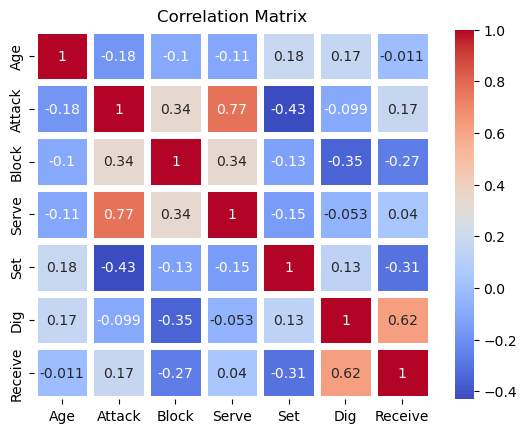

In [10]:
sns.heatmap(corr_matrix, annot= True, cmap = "coolwarm", linewidths=5)
plt.title("Correlation Matrix")
plt.show()

## 🔗 Correlation Heatmap of Performance Metrics

This heatmap visualizes the pairwise Pearson correlation between key numerical performance metrics: Attack, Block, Serve, Set, Dig, and Receive.

Key observations:
- **Attack and Serve** have a very strong positive correlation (**0.77**), suggesting that players who perform well in one are likely to excel in the other.
- **Block** correlates moderately with **Attack** and **Serve** (both around **0.34**), which makes sense as these are all offensive skills.
- **Dig and Receive** show a strong correlation (**0.62**), indicating they are often complementary in defensive roles.
- **Set** has negative correlations with offensive stats like Attack and Serve, suggesting a possible trade-off in player roles (e.g., setters are not typically attackers).

This correlation analysis helps identify which features tend to move together and may guide future feature selection or player profiling.


In [11]:
position_counts = df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

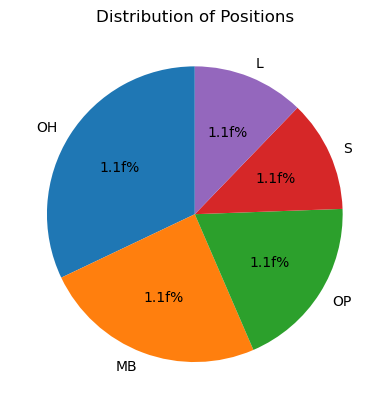

In [12]:
plt.pie(position_counts, labels = position_counts.index, autopct= "1.1f%%", startangle=90)
plt.title("Distribution of Positions")
plt.show()

## 🧍‍♂️ Player Position Distribution

This pie chart illustrates the distribution of player positions across the dataset.

The dataset includes:
- **OH (Outside Hitters)**
- **MB (Middle Blockers)**
- **OP (Opposite Hitters)**
- **S (Setters)**
- **L (Liberos)**



In [13]:
avg_attack_by_country = df.groupby("Country") ["Attack"].mean()
avg_attack_by_country.sort_values(ascending=False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

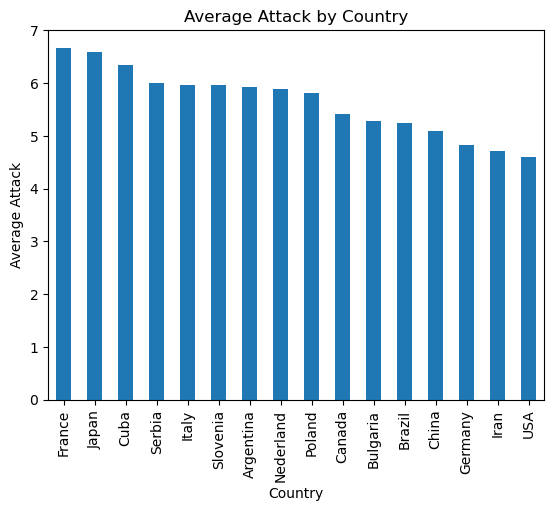

In [15]:
avg_attack_by_country.sort_values(ascending=False).plot(kind = "bar")
plt.title("Average Attack by Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

## 🌍 Average Attack Score by Country

This bar chart ranks countries by their average attack performance.

Key takeaways:
- **France, Japan, and Cuba** lead in average attack scores, indicating highly efficient or aggressive offensive strategies.
- **USA, Germany, and Iran** rank lower in this metric, which might reflect differences in team composition, play style, or match difficulty.
- The smooth gradient from left to right suggests a fairly continuous spread rather than a sharp performance gap.



In [16]:
avg_serve_by_age = df.groupby("Age") ["Serve"].mean()
avg_serve_by_age


Age
19    0.200000
20    0.880000
21    0.770000
22    0.534286
23    0.526667
24    0.640667
25    0.165714
26    0.681053
27    0.662500
28    0.667273
29    0.477500
30    0.429231
31    0.910000
32    0.290000
33    0.321429
34    0.026667
35    0.666667
36    0.660000
37    0.270000
38    0.400000
41    0.000000
Name: Serve, dtype: float64

In [21]:
df.groupby(["Country", "Position"]) ["Attack"].max().reset_index().sort_values(ascending=False, by ="Attack").head(20)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [22]:
df.groupby("Country") ["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

In [25]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

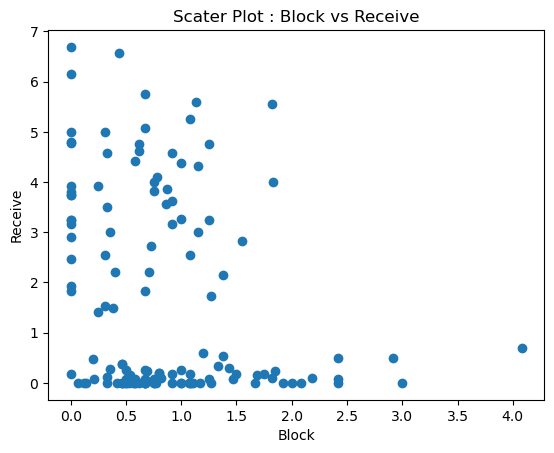

In [26]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scater Plot : Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

## 📌 Block vs. Receive Scatter Plot

This scatter plot visualizes the relationship between the number of blocks and receive scores for players.

- Most data points cluster near lower block values, indicating that high receive scores are rarely paired with high blocking.
- There is no strong linear trend, suggesting a **weak or no correlation** between blocking and receiving.
- This makes intuitive sense, as players who specialize in blocking (like middle blockers) are often not the ones handling receive duties.

This supports the idea of **specialized roles** in volleyball, where offensive and defensive responsibilities are split.


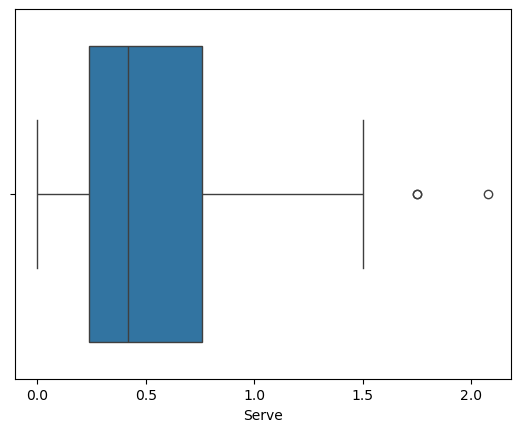

In [41]:
sns.boxplot(x = df["Serve"])
plt.xlabel("Serve")
plt.show()

## 📦 Serve Performance Distribution

This boxplot shows the distribution of serve metrics across all players:

- The **interquartile range (IQR)** is between roughly 0.3 and 0.9.
- There are a few **outliers** with significantly higher serve scores.
- The median serve value appears around 0.4.

This plot helps visualize spread and identify extreme values. It’s useful for evaluating consistency and spotting performance anomalies.


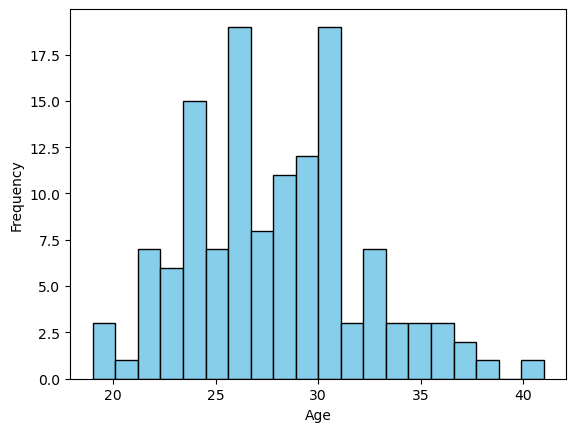

In [28]:
plt.hist(df["Age"], bins = 20, color = "skyblue", edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 👥 Age Distribution of Players

This histogram shows the frequency of player ages:

- Most players fall in the **24 to 31** age range.
- There's a peak around age **26–30**, indicating that the majority are in their athletic prime.
- A few players are older (up to 40), likely highly experienced veterans.

This kind of distribution is typical in high-performance sports — a helpful demographic snapshot for performance planning or recruitment.


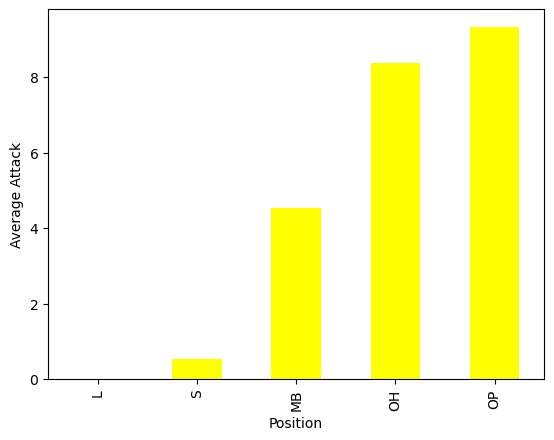

In [40]:
avg_attack_by_position = df.groupby("Position") ["Attack"].mean()

avg_attack_by_position.sort_values(ascending = True).plot(kind= "bar", color = "yellow")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

## 🏐 Average Attack by Player Position

This bar chart shows the average attack score for each player position:

- **Opposite Hitters (OP)** and **Outside Hitters (OH)** lead in average attack metrics, as expected — these roles are primary attackers.
- **Middle Blockers (MB)** rank in the middle, contributing offensively but also playing strong defensive roles.
- **Setters (S)** and **Liberos (L)** show negligible attack scores, which aligns with their designated team responsibilities.

This chart confirms the expected distribution of offensive activity based on position, reinforcing that attackers specialize significantly compared to setters or defenders


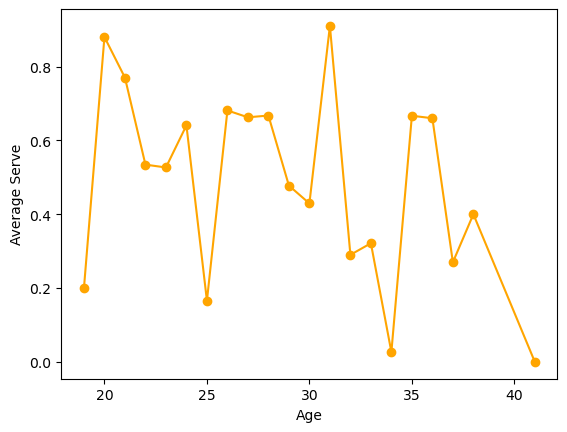

In [34]:
serve_trend_by_age = df.groupby("Age") ["Serve"].mean()

serve_trend_by_age.plot(kind ="line", marker = "o", linestyle =  "-", color = "orange")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

## 📊 Average Serve Score by Age

This line plot tracks how average serve scores vary with player age:

- Serve performance appears somewhat **erratic**, with fluctuations across the age range of 19 to 41.
- There are **peaks around age 20 and 31**, and a drop-off at age 41.
- The variance may indicate individual player influence rather than an age-driven trend.

This suggests that **serving ability is not strongly tied to age**, and individual skill or training likely plays a bigger role than experience alone.


In [35]:
total_attack_block_by_country = df.groupby("Country") [["Attack", "Block"]].sum()

In [36]:
total_attack_block_by_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


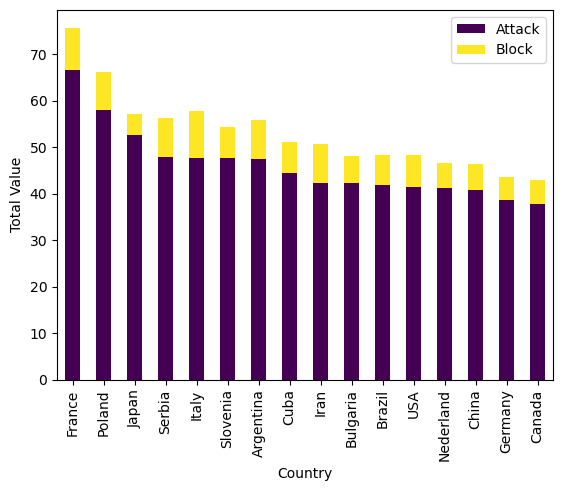

In [42]:
total_attack_block_by_country.sort_values(ascending=False, by= "Attack").plot(kind = "bar", stacked = True, colormap= "viridis")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()

## 🇺🇳 Total Attack and Block by Country (Stacked Bar Chart)

This stacked bar chart compares **total attack and block contributions** for each country:

- **France**, **Poland**, and **Japan** top the list with the highest total values.
- The **purple section** represents attack metrics, while **yellow** represents blocks.
- Some countries (e.g., **Italy**, **Argentina**) show a more balanced contribution, while others (e.g., **France**) lean heavily on attack.

This visualization helps identify team play styles — whether they rely more on offensive strength or defensive stability — and highlights high-performing teams.
